# GIS data based house prices EDA and ML analysis

## 1. Prepare data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset from GIS data

import geopandas as gpd
import pandas as pd

# Read from shp file
gdf = gpd.read_file("./data/housing_data_with_attributes.shp")

# 从 GeoDataFrame 中提取经纬度
gdf['longitude'] = gdf.geometry.x
gdf['latitude'] = gdf.geometry.y

# 将 GeoDataFrame 转换为 DataFrame
# 删除原始的 'geometry' 列，如果您希望保留几何信息，则不需要执行此步骤
data = pd.DataFrame(gdf.drop(columns='geometry'))

# 查看 DataFrame 的前几行
print(data.head())

   housing_me  total_room  total_bedr  population  households  median_inc  \
0        41.0       880.0       129.0       322.0       126.0      8.3252   
1        21.0      7099.0      1106.0      2401.0      1138.0      8.3014   
2        52.0      1467.0       190.0       496.0       177.0      7.2574   
3        52.0      1274.0       235.0       558.0       219.0      5.6431   
4        52.0      1627.0       280.0       565.0       259.0      3.8462   

   median_hou ocean_prox  longitude  latitude  
0    452600.0   NEAR BAY    -122.23     37.88  
1    358500.0   NEAR BAY    -122.22     37.86  
2    352100.0   NEAR BAY    -122.24     37.85  
3    341300.0   NEAR BAY    -122.25     37.85  
4    342200.0   NEAR BAY    -122.25     37.85  


In [3]:
data.head(4)

,housing_me,total_room,total_bedr,population,households,median_inc,median_hou,ocean_prox,longitude,latitude
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122.23,37.88
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122.22,37.86
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122.24,37.85
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122.25,37.85


In [4]:
data.describe()

,housing_me,total_room,total_bedr,population,households,median_inc,median_hou,longitude,latitude
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,-119.569704,35.631861
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,2.003532,2.135952
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,-124.350000,32.540000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,-121.800000,33.930000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,-118.490000,34.260000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,-118.010000,37.710000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,-114.310000,41.950000


In [5]:
data.isnull().sum()

housing_me      0
total_room      0
total_bedr    207
population      0
households      0
median_inc      0
median_hou      0
ocean_prox      0
longitude       0
latitude        0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   housing_me  20640 non-null  float64
 1   total_room  20640 non-null  float64
 2   total_bedr  20433 non-null  float64
 3   population  20640 non-null  float64
 4   households  20640 non-null  float64
 5   median_inc  20640 non-null  float64
 6   median_hou  20640 non-null  float64
 7   ocean_prox  20640 non-null  object 
 8   longitude   20640 non-null  float64
 9   latitude    20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## 2. Visualize relationships between feathers

### 2.1 Pairplot and Heatmap

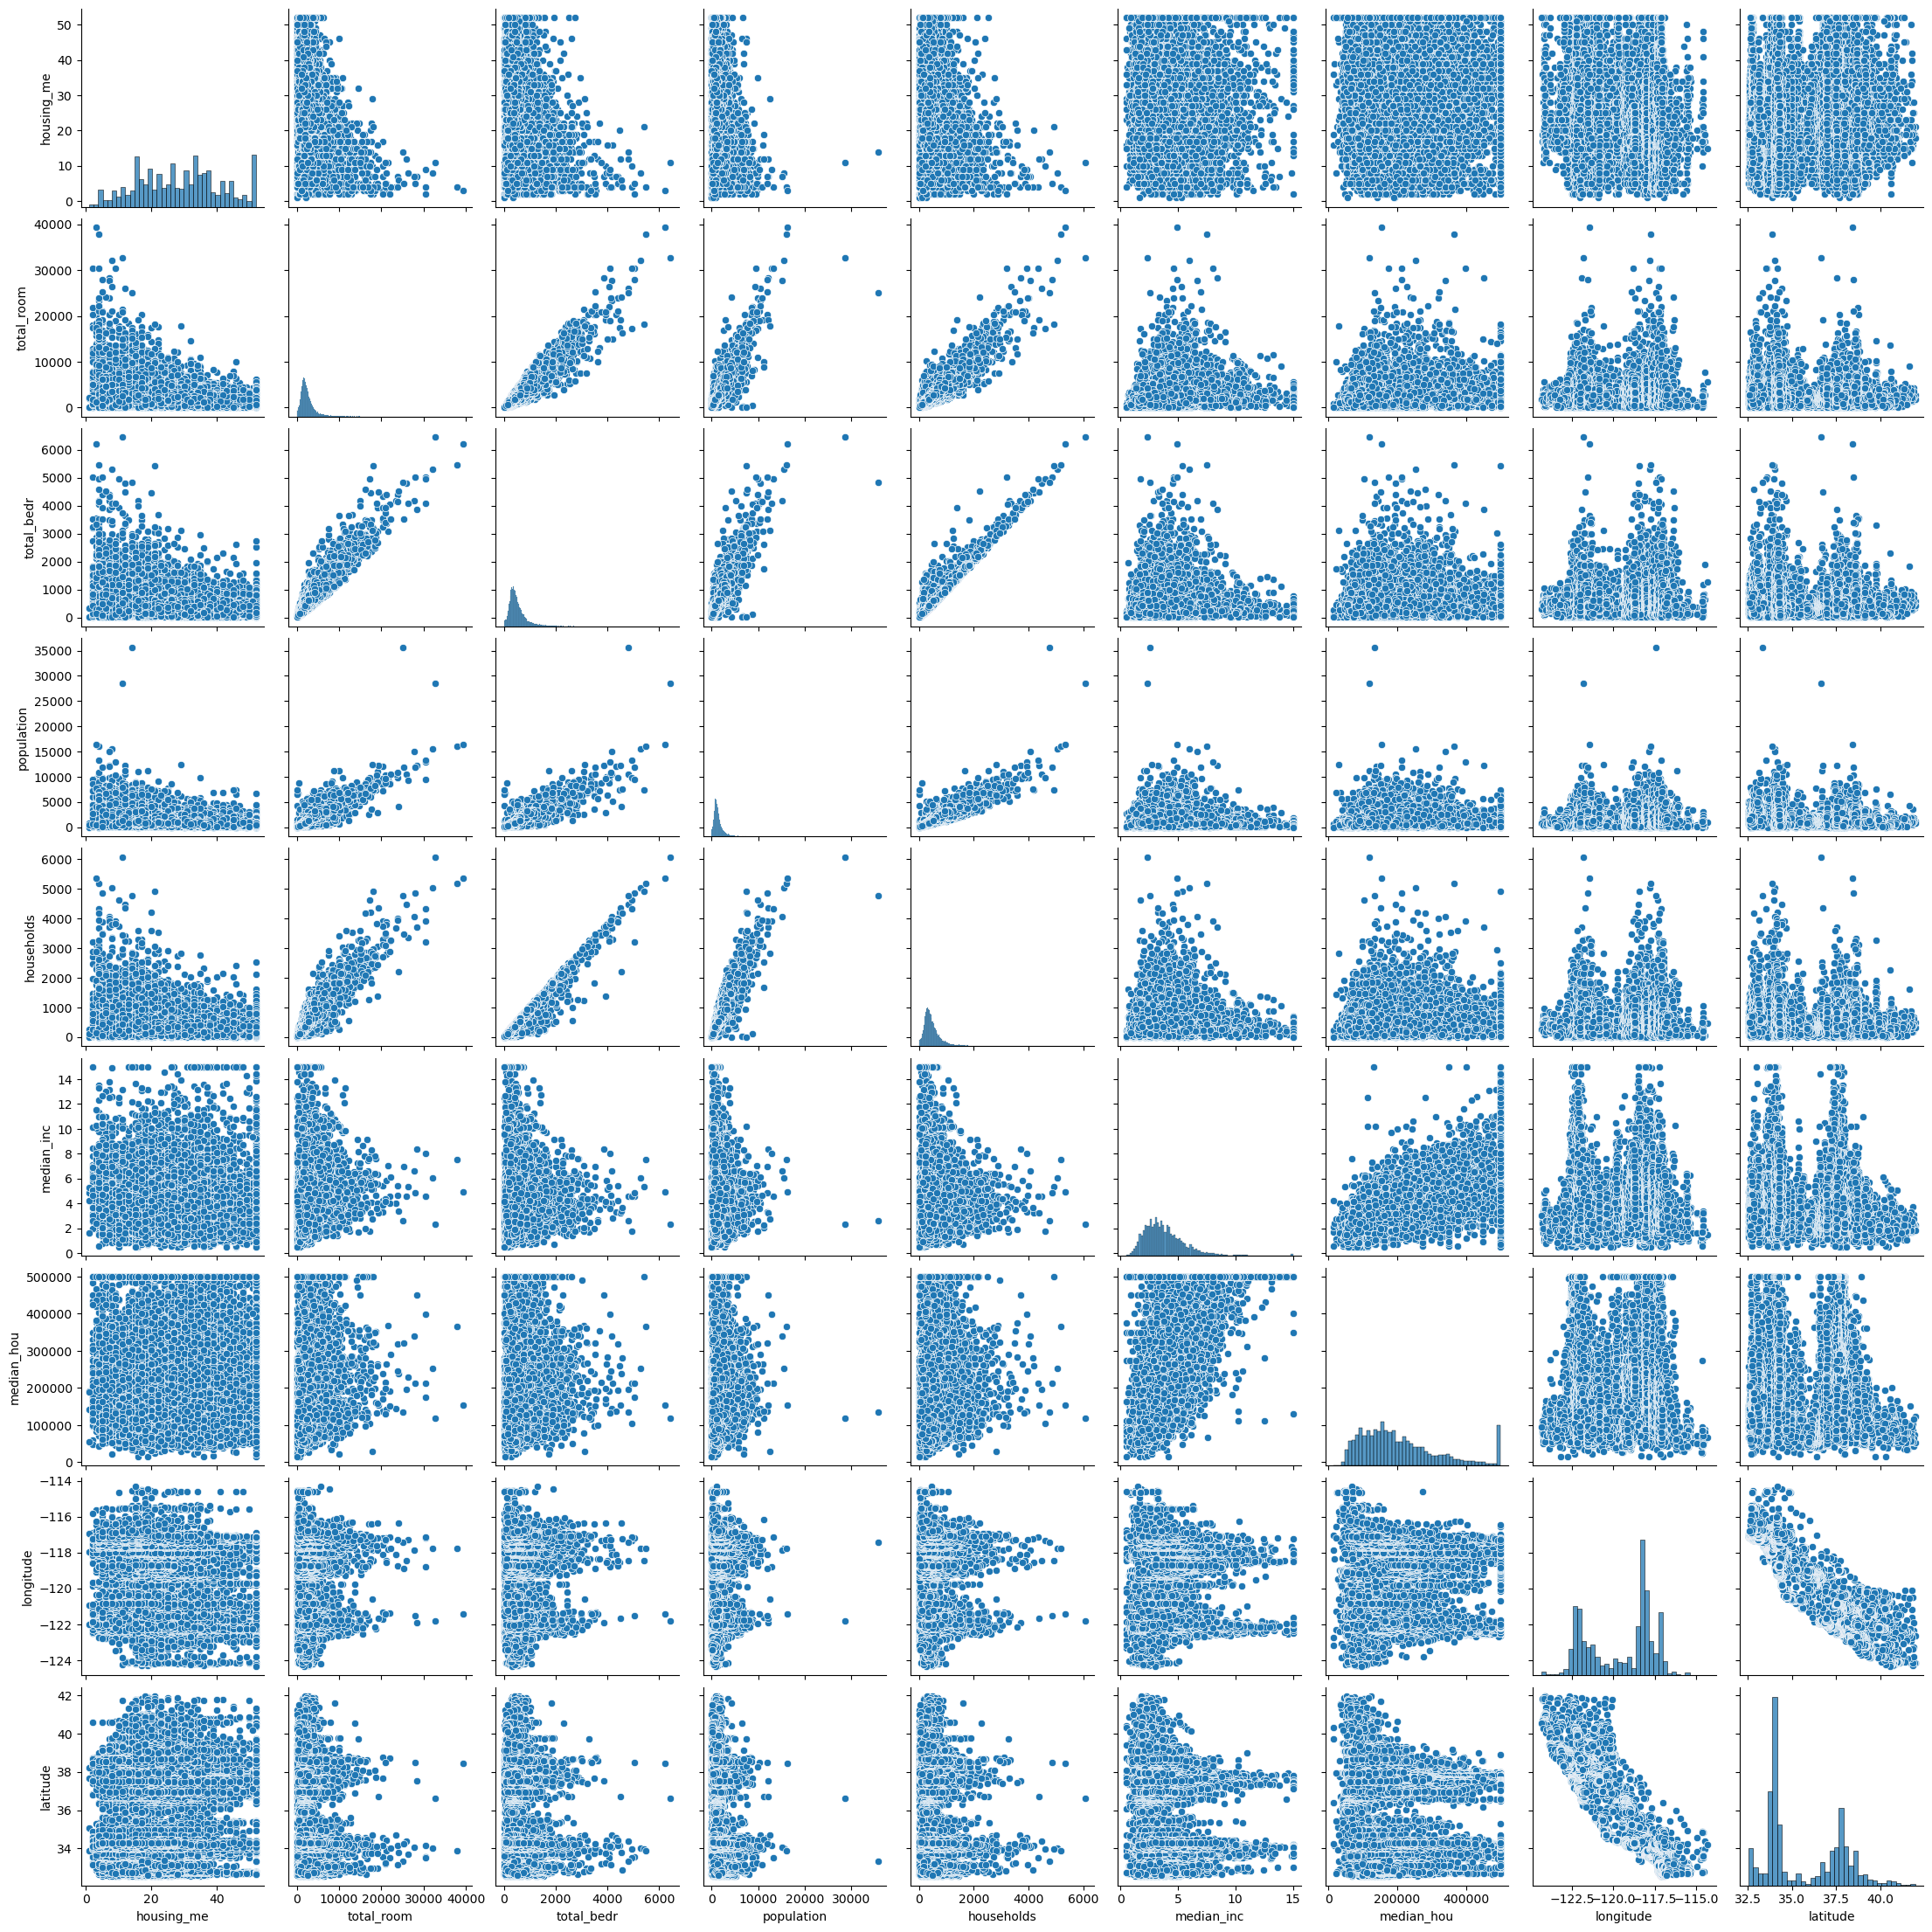

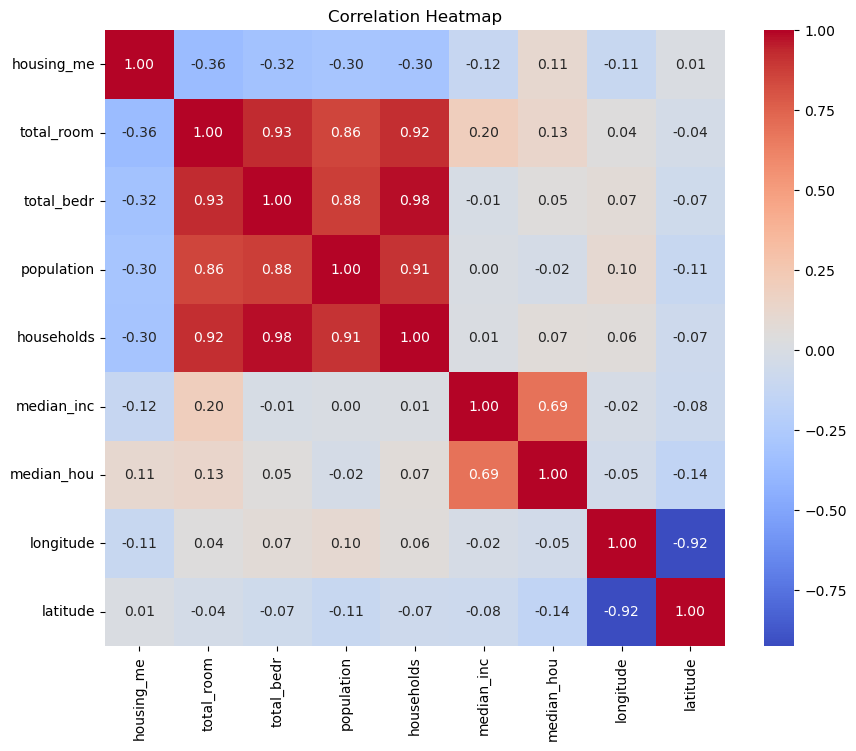

In [8]:
sns.pairplot(data)
plt.show()

# Exclude non-numeric columns for correlation heatmap
numeric_data = data.drop(columns=['ocean_prox'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 2.2 Scatter plot of geographical data

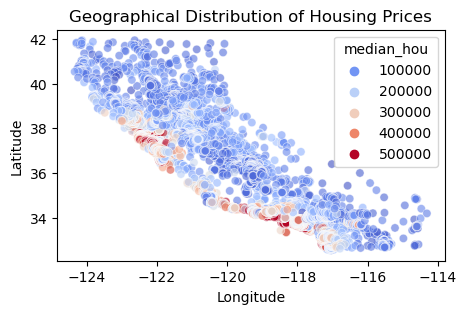

In [10]:
plt.figure(figsize=(5, 3))
sns.scatterplot(x='longitude', y='latitude', data=data, hue='median_hou', palette='coolwarm', alpha=0.6)
plt.title('Geographical Distribution of Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

### 2.3 Distribution of median_house_value

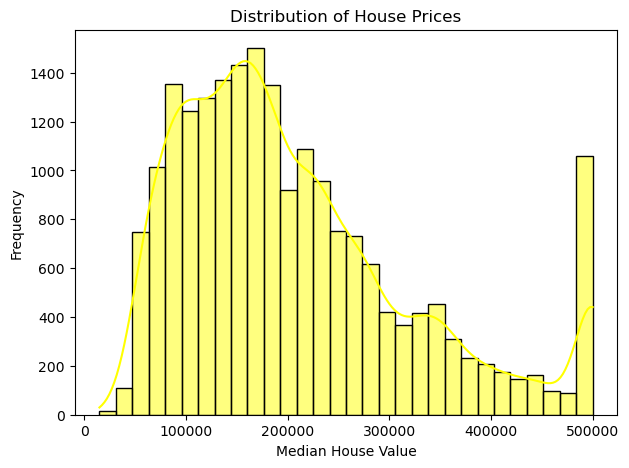

In [12]:
plt.figure(figsize=(7, 5))
sns.histplot(data['median_hou'], bins=30, kde=True, color='yellow')
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

### 2.4 Distribution of Categorical Variable ('ocean_proximity')

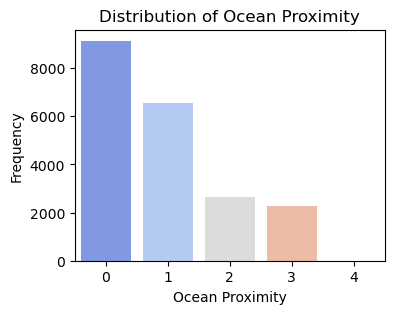

In [14]:
plt.figure(figsize=(4, 3))
sns.countplot(x=data['ocean_prox'].map({'<1H OCEAN': 0, 'INLAND': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND': 4}), palette='coolwarm')
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Frequency')
plt.show()

### 2.5 Relationship between Features and Target

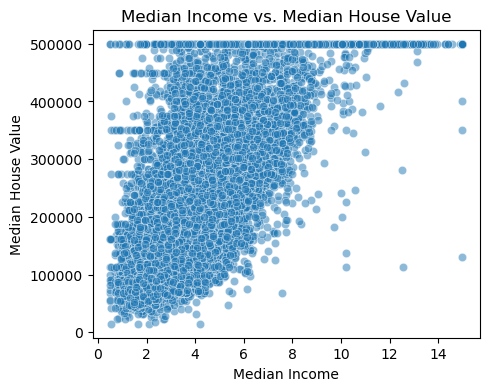

In [16]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='median_inc', y='median_hou', data=data, alpha=0.5)
plt.title('Median Income vs. Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

## 3. ML Analysis

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [24]:
# Initialize LabelEncoder
encoder = LabelEncoder()

In [25]:
# Encode the 'ocean_proximity' column in both training and testing sets
X_train['ocean_proximity_encoded'] = encoder.fit_transform(X_train['ocean_prox'])
X_test['ocean_proximity_encoded'] = encoder.transform(X_test['ocean_prox'])

NameError: name 'X_train' is not defined

Split Data

In [39]:
# Drop the original 'ocean_proximity' column
X_train.drop(columns=['ocean_proximity'], inplace=True)
X_test.drop(columns=['ocean_proximity'], inplace=True)

In [40]:
# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Impute missing values in the test set
X_test_imputed = imputer.fit_transform(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 49854.65158695816


#### The Root Mean Squared Error (RMSE) of approximately 49854.65 indicates that, on average, the model's predictions deviate by around $49854.65 from the actual house prices in the test set. This value gives us an understanding of the performance of the model in predicting house prices, with lower RMSE values indicating better performance.

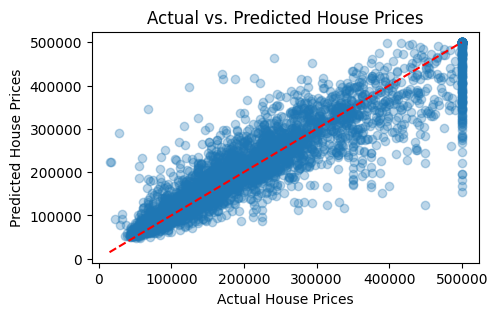

In [49]:
plt.figure(figsize=(5, 3))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.title('Actual vs. Predicted House Prices')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.show()

### **House Price VS Number of Rooms**

In [62]:
# Prepare the data
X = data['total_rooms'].values.reshape(-1, 1)  # Feature: total_rooms
y = data['median_house_value'].values  # Target variable: median_house_value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [64]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [65]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 129388.84092492807


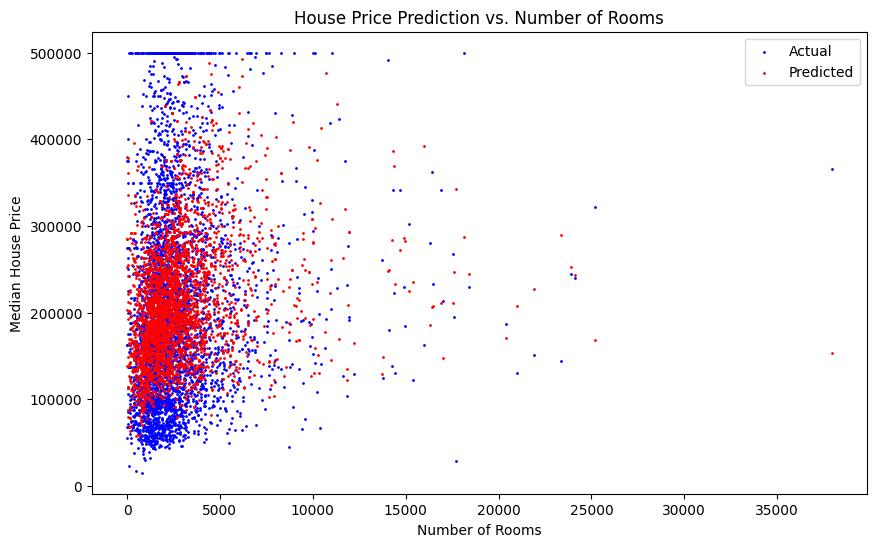

In [68]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual', s=1)
plt.scatter(X_test, y_pred, color='red', label='Predicted', s=1)
plt.title('House Price Prediction vs. Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median House Price')
plt.legend()
plt.show()

### **Predicted House Price vs. Actual House Price on Lat and Lng**

Root Mean Squared Error: 51255.8937678435


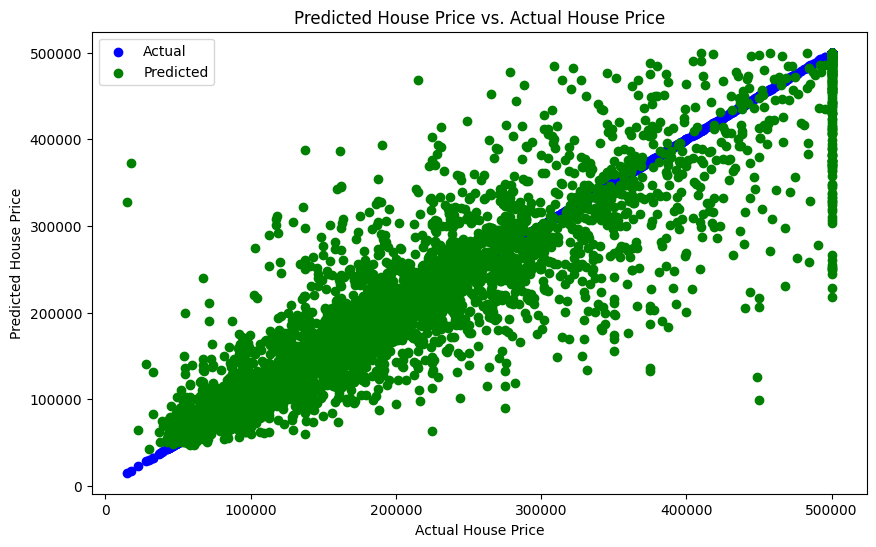

In [83]:
# Prepare the data
X = data[['longitude', 'latitude']]  # Features: longitude and latitude
y = data['median_house_value'].values  # Target variable: median_house_value

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


# Plot the results for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='blue', label='Actual')  # Actual house prices
plt.scatter(y_test, y_pred, color='green', label='Predicted')  # Predicted house prices
plt.title('Predicted House Price vs. Actual House Price')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.legend()
plt.show()